<a href="https://colab.research.google.com/gist/ChukwudiOsanu/97285687618680999208c2f3f42fc176/possiblefinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#visualization 
import seaborn as sns #visualization
from sklearn.model_selection import train_test_split #splitting data
from sklearn.neighbors import KNeighborsClassifier #Classification model
from sklearn.linear_model import LogisticRegression #Classification model
from sklearn.preprocessing import StandardScaler #scaling data
from sklearn.ensemble import RandomForestClassifier #Classification model
from sklearn.metrics import accuracy_score #Scoring the model
from sklearn.metrics import f1_score #Scoring the model
from sklearn.metrics import precision_score, recall_score #Scoring the model
from sklearn.metrics import matthews_corrcoef #Scoring the model
from sklearn.metrics import confusion_matrix #creates matrix model

In [ ]:
FraudDF = pd.read_csv("fraudTrain.csv")

In [ ]:
FraudDF.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
FraudDF = FraudDF.replace([np.inf, -np.inf], np.nan)
FraudDF = FraudDF.dropna()
FraudDF = FraudDF.reset_index()

In [ ]:
FraudDF.drop(['index','Unnamed: 0'],axis='columns',inplace=True)

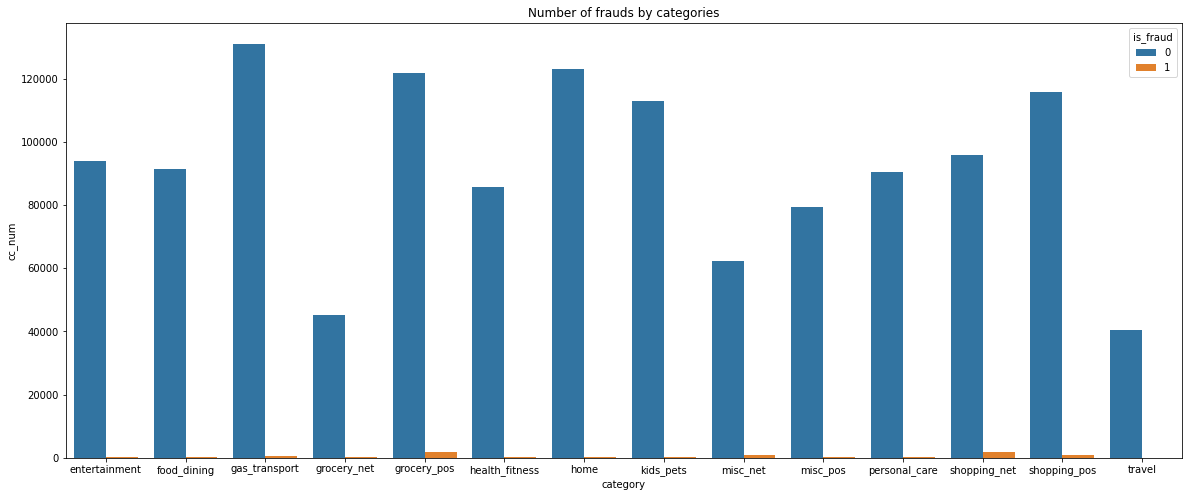

In [ ]:
#gives the number of frauds by categories
plt.figure(figsize=(20,8))
plt.title('Number of frauds by categories')
sns.barplot(x="category", y='cc_num' ,hue="is_fraud", data=FraudDF.groupby(['category','is_fraud']).agg({'cc_num':'count'}).reset_index())

In [ ]:
is_fraud = FraudDF[FraudDF["is_fraud"]==1]

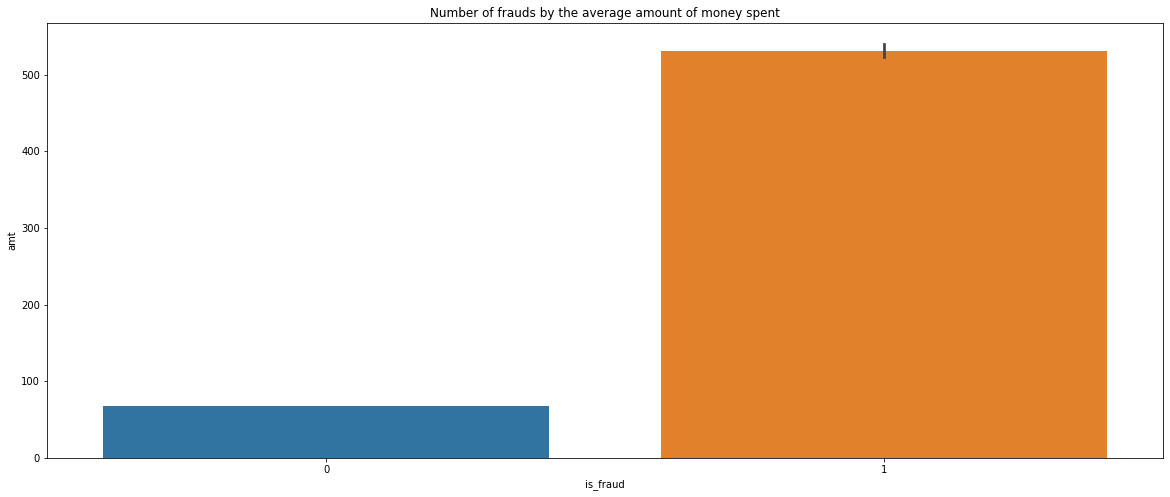

In [ ]:
#Average money spent on fraud 
plt.figure(figsize=(20,8))
plt.title('Number of frauds by the average amount of money spent')
sns.barplot(x="is_fraud", y='amt', data=FraudDF)

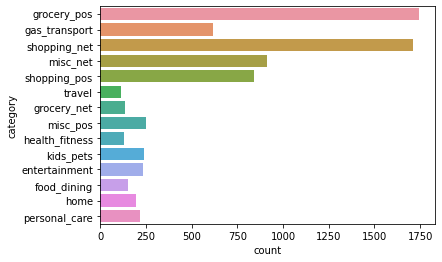

In [ ]:
# shows the transaction by category 
sns.countplot(y=is_fraud.category)
plt.show()

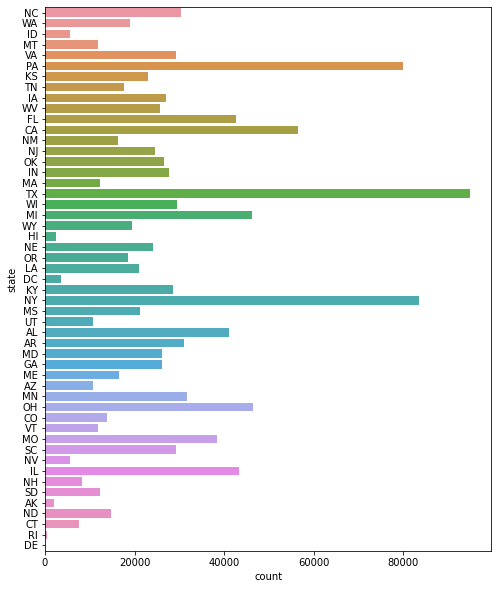

In [ ]:
#transactions by states
plt.figure(figsize = [8,10])
sns.countplot(y=FraudDF.state)
plt.show()

In [ ]:
FraudDF.shape

(1296675, 22)

In [ ]:
#does a count of all the cases in the DF
cases = len(FraudDF['is_fraud'])
#does a count of non fraud cases
nonfraud_count = len(FraudDF[FraudDF['is_fraud'] == 0])
#count of fraud cases
fraud_count = len(FraudDF[FraudDF['is_fraud'] == 1])
#gives the percentage
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

In [ ]:
print("There are:",cases,"Cases")
print("There are:",nonfraud_count,'Non fraud cases found')
print("There are:",fraud_count,'Fraud cases found')
print(fraud_percentage,'% is the percentage of fraud cases')

There are: 1296675 Cases
There are: 1289169 Non fraud cases found
There are: 7506 Fraud cases found
0.58 % is the percentage of fraud cases


In [ ]:
FraudDF.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [ ]:
#normalizing the data by turning it into a count
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [ ]:
data=mapping(FraudDF,"gender")

In [ ]:
data=mapping(FraudDF,"category")

In [ ]:
data=mapping(FraudDF,"state")

In [ ]:
FraudDF.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",5,4.97,Jennifer,Banks,1,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",9,107.23,Stephanie,Gill,1,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,13,220.11,Edward,Sanchez,0,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [ ]:
#delete the non relevant data now
FraudDF.drop(['first','last','street','cc_num','trans_num','city','zip','job','dob','unix_time','merchant','trans_date_trans_time',],axis='columns',inplace=True)

In [ ]:
FraudDF.head(5)

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,5,4.97,1,23,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,9,107.23,1,3,48.8878,-118.2105,149,49.159047,-118.186462,0
2,13,220.11,0,37,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,11,45.00,0,24,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,4,41.96,0,5,38.4207,-79.4629,99,38.674999,-78.632459,0


In [ ]:
#scaled it due to the varriables being too big
sc = StandardScaler()
amount = FraudDF['amt'].values
FraudDF['amt'] = sc.fit_transform(amount.reshape(-1, 1))
sc = StandardScaler()
lat = FraudDF['lat'].values
FraudDF['lat'] = sc.fit_transform(lat.reshape(-1, 1))

sc = StandardScaler()
long = FraudDF['long'].values
FraudDF['long'] = sc.fit_transform(long.reshape(-1, 1))

sc = StandardScaler()
city_pop = FraudDF['city_pop'].values
FraudDF['city_pop'] = sc.fit_transform(city_pop.reshape(-1, 1))

sc = StandardScaler()
merch_long = FraudDF['merch_long'].values
FraudDF['merch_long'] = sc.fit_transform(merch_long.reshape(-1, 1))

sc = StandardScaler()
merch_lat = FraudDF['merch_lat'].values
FraudDF['merch_lat'] = sc.fit_transform(merch_lat.reshape(-1, 1))

sc = StandardScaler()
state = FraudDF['state'].values
FraudDF['state'] = sc.fit_transform(state.reshape(-1, 1))

sc = StandardScaler()
gender = FraudDF['gender'].values
FraudDF['gender'] = sc.fit_transform(gender.reshape(-1, 1))

sc = StandardScaler()
category = FraudDF['category'].values
FraudDF['category'] = sc.fit_transform(category.reshape(-1, 1))

In [ ]:
FraudDF.head(3)

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,-0.452853,-0.407826,0.909206,-0.022519,-0.484420,0.657620,-0.282589,-0.494354,0.593864,0
1,0.569266,0.230039,0.909206,-1.418098,2.039120,-2.033870,-0.293670,2.078699,-2.030341,0
2,1.591384,0.934149,-1.099861,0.954386,0.717754,-1.601537,-0.280406,0.902849,-1.592323,0


In [ ]:
#Sets X and Y
X = FraudDF.drop(['is_fraud'], axis = 1).values
y = FraudDF['is_fraud'].values
#split the data with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
print(X.shape)
print(y.shape)

(1296675, 9)
(1296675,)


In [ ]:
print('X_train samples : ', X_train[10:])

X_train samples :  [[ 0.05820637 -0.02969782  0.90920585 ... -0.28196284  1.44809085
  -2.15024602]
 [ 1.33585425 -0.42834805  0.90920585 ... -0.29009647  0.16655098
   0.33975716]
 [-0.70838235 -0.14241273  0.90920585 ...  4.92972273  0.64254505
   1.20125905]
 ...
 [ 1.33585425 -0.07616855  0.90920585 ... -0.28061828 -0.98298082
  -0.41884021]
 [ 1.59138383 -0.25044937 -1.09986093 ... -0.27578976  1.07017525
   0.0825144 ]
 [-0.70838235 -0.06425458  0.90920585 ... -0.2932923  -1.23346742
  -0.42697711]]


In [ ]:
print('y_train samples : ', y_train[:10])

y_train samples :  [0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Calls the KNeighbors Classifier model
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_yhat = kn.predict(X_test)

In [ ]:
#Calls the Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
#Calls the Random Forest Classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
#finds the length of fraud
n_outliers = len(is_fraud)
n_errors = (rf_yhat != y_test).sum()
print("The model used is Random Forest Classifier")
#Finds the accuracy Score
acc = accuracy_score(y_test, rf_yhat)
print("The accuracy is {}".format(acc))
#Finds the Precision score
prec = precision_score(y_test, rf_yhat)
print("The precision is {}".format(prec))
#Finds the recall score
rec = recall_score(y_test, rf_yhat)
print("The recall is {}".format(rec))
#Finds the F1 score
f1 = f1_score(y_test, rf_yhat)
print("The F1-Score is {}".format(f1))
#Finds the MCC score
MCC = matthews_corrcoef(y_test, rf_yhat)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest Classifier
The accuracy is 0.9972175007480666
The precision is 0.8331099195710456
The recall is 0.6555907172995781
The F1-Score is 0.7337662337662338
The Matthews correlation coefficient is 0.7377060972422131


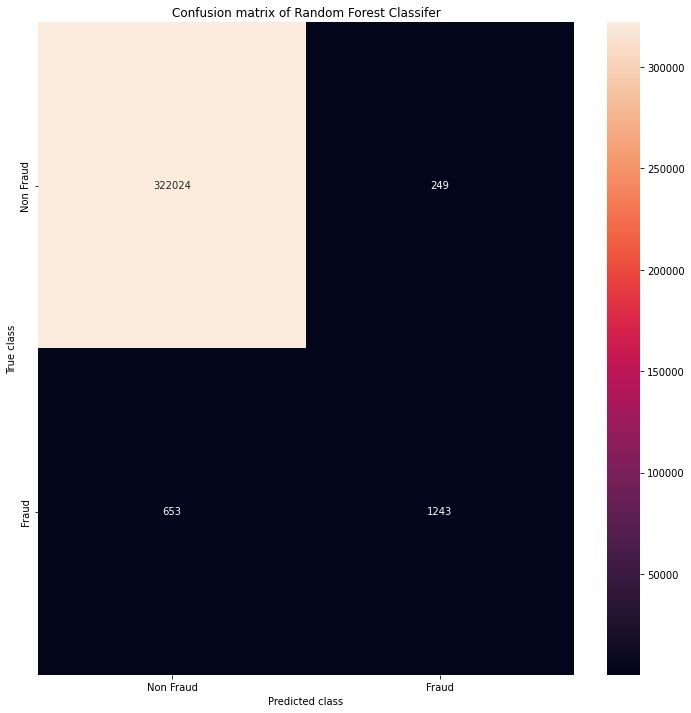

In [ ]:
#Creating a confusion matrix with the RF yhat
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, rf_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Random Forest Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
n_outliers = len(is_fraud)
n_errors = (kn_yhat != y_test).sum()
print("The model used is Kneighbor Classifier")
acc = accuracy_score(y_test, kn_yhat)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, kn_yhat)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, kn_yhat)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, kn_yhat)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(y_test, kn_yhat)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Kneighbor Classifier
The accuracy is 0.996134732192159
The precision is 0.7275300778485492
The recall is 0.5421940928270043
The F1-Score is 0.6213357509821699
The Matthews correlation coefficient is0.6262095847966577


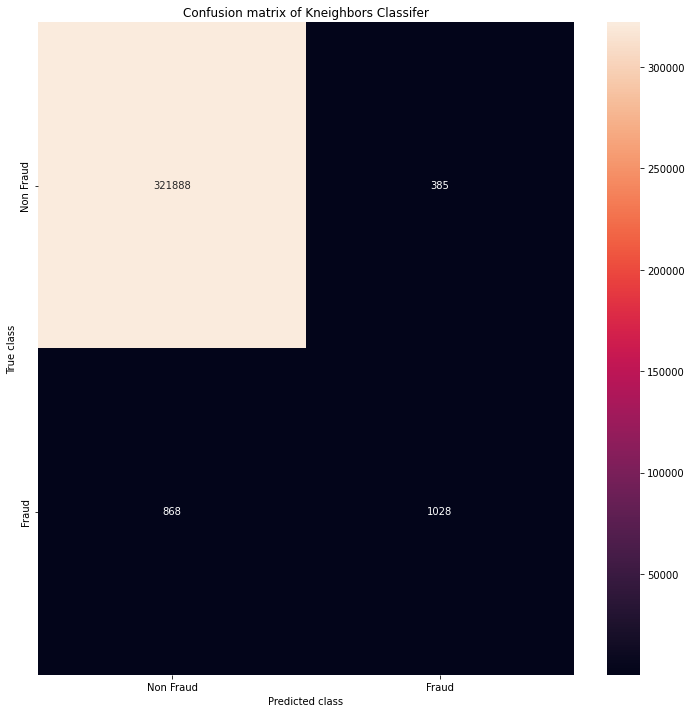

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, kn_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Kneighbors Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
n_outliers = len(is_fraud)
n_errors = (lr_yhat != y_test).sum()
print("The model used is Logistic Regression Classifier")
acc = accuracy_score(y_test, lr_yhat)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, lr_yhat)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, lr_yhat)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, lr_yhat)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(y_test, lr_yhat)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logistic Regression Classifier
The accuracy is 0.9936236962818776
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is-0.0017621143829963564


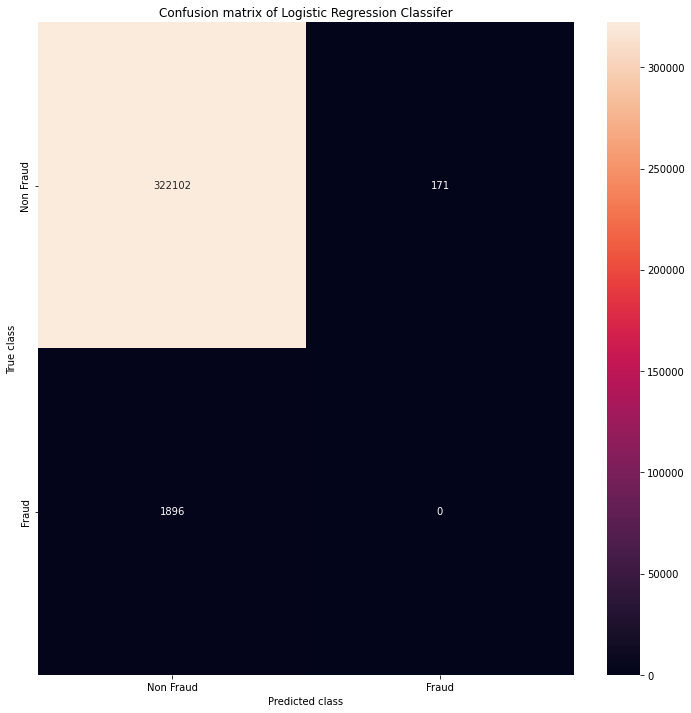

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, lr_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Logistic Regression Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
#Dataset for the Testing set
FraudTest = pd.read_csv("fraudTest.csv")

In [ ]:
FraudTest = FraudTest.replace([np.inf, -np.inf], np.nan)
FraudTest = FraudTest.dropna()
FraudTest = FraudTest.reset_index()

In [ ]:
FraudTest.head()

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
FraudTest.drop(['index','Unnamed: 0'],axis='columns',inplace=True)

In [ ]:
FraudTest.drop(['first','last','street','cc_num','trans_num','city','zip','job','dob','unix_time','merchant','trans_date_trans_time',],axis='columns',inplace=True)

In [ ]:
FraudTest.dtypes

category       object
amt           float64
gender         object
state          object
lat           float64
long          float64
city_pop        int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [ ]:
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

In [ ]:
data=mapping(FraudTest,"gender")
data=mapping(FraudTest,"category")
data=mapping(FraudTest,"state")

In [ ]:
FraudTest.head(5)

,category,amt,gender,state,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,3,2.86,0,10,33.9659,-80.9355,333497,33.986391,-81.200714,0
1,3,29.84,1,6,40.3207,-110.4360,302,39.450498,-109.960431,0
2,8,41.28,1,16,40.6729,-73.5365,34496,40.495810,-74.196111,0
3,4,60.05,0,41,28.5697,-80.8191,54767,28.812398,-80.883061,0
4,0,3.19,0,28,44.2529,-85.0170,1126,44.959148,-85.884734,0


In [ ]:
sc = StandardScaler()
amount = FraudDF['amt'].values
FraudDF['amt'] = sc.fit_transform(amount.reshape(-1, 1))
sc = StandardScaler()
lat = FraudDF['lat'].values
FraudDF['lat'] = sc.fit_transform(lat.reshape(-1, 1))

sc = StandardScaler()
long = FraudDF['long'].values
FraudDF['long'] = sc.fit_transform(long.reshape(-1, 1))

sc = StandardScaler()
city_pop = FraudDF['city_pop'].values
FraudDF['city_pop'] = sc.fit_transform(city_pop.reshape(-1, 1))

sc = StandardScaler()
merch_long = FraudDF['merch_long'].values
FraudDF['merch_long'] = sc.fit_transform(merch_long.reshape(-1, 1))

sc = StandardScaler()
merch_lat = FraudDF['merch_lat'].values
FraudDF['merch_lat'] = sc.fit_transform(merch_lat.reshape(-1, 1))

sc = StandardScaler()
state = FraudDF['state'].values
FraudDF['state'] = sc.fit_transform(state.reshape(-1, 1))

sc = StandardScaler()
gender = FraudDF['gender'].values
FraudDF['gender'] = sc.fit_transform(gender.reshape(-1, 1))

sc = StandardScaler()
category = FraudDF['category'].values
FraudDF['category'] = sc.fit_transform(category.reshape(-1, 1))

In [ ]:
X = FraudTest.drop(['is_fraud'], axis = 1).values
y = FraudTest['is_fraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
n_outliers = len(is_fraud)
n_errors = (rf_yhat != y_test).sum()
print("The model used is Random Forest Classifier")
acc = accuracy_score(y_test, rf_yhat)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, rf_yhat)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, rf_yhat)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, rf_yhat)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(y_test, rf_yhat)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest Classifier
The accuracy is 0.9960771611602965
The precision is 1.0
The recall is 0.005474452554744526
The F1-Score is 0.010889292196007259
The Matthews correlation coefficient is0.07384427327758988


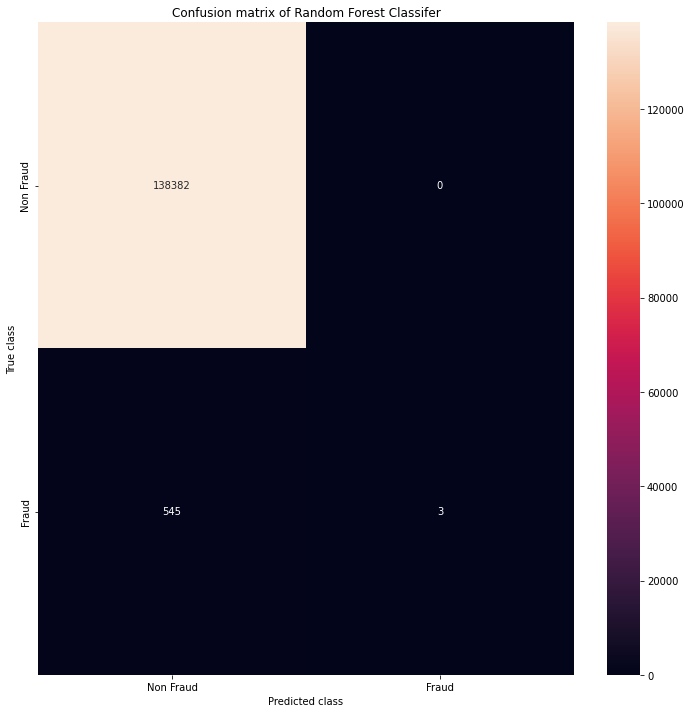

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, rf_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Random Forest Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
n_outliers = len(is_fraud)
n_errors = (lr_yhat != y_test).sum()
print("The model used is Logistic Regression Classifier")
acc = accuracy_score(y_test, lr_yhat)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, lr_yhat)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, lr_yhat)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, lr_yhat)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(y_test, lr_yhat)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Logistic Regression Classifier
The accuracy is 0.9957100698193335
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is-0.001169898314796069


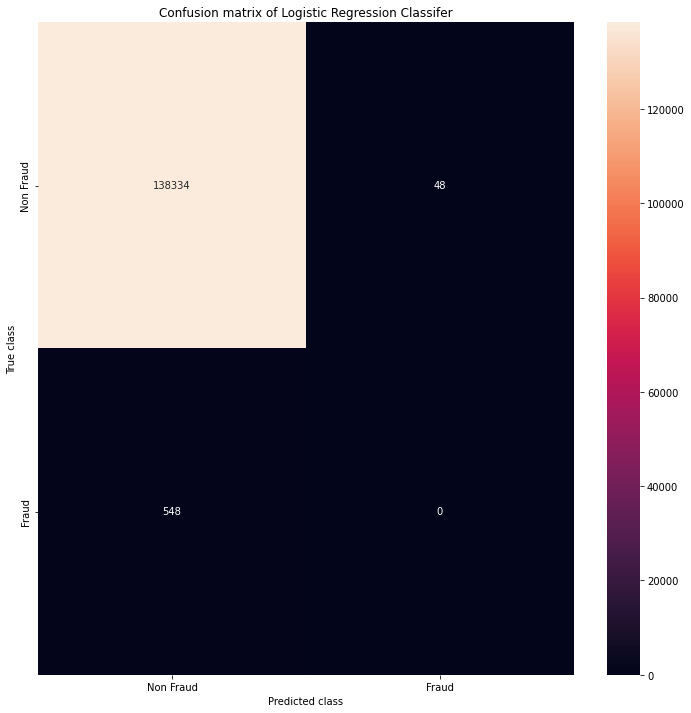

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, lr_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Logistic Regression Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
kn_yhat = kn.predict(X_test)

In [ ]:
n_outliers = len(is_fraud)
n_errors = (kn_yhat != y_test).sum()
print("The model used is Kneighbor Classifier")
acc = accuracy_score(y_test, kn_yhat)
print("The accuracy is {}".format(acc))
 
prec = precision_score(y_test, kn_yhat)
print("The precision is {}".format(prec))
 
rec = recall_score(y_test, kn_yhat)
print("The recall is {}".format(rec))
 
f1 = f1_score(y_test, kn_yhat)
print("The F1-Score is {}".format(f1))
 
MCC = matthews_corrcoef(y_test, kn_yhat)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Kneighbor Classifier
The accuracy is 0.9961635355934644
The precision is 0.5259515570934256
The recall is 0.2773722627737226
The F1-Score is 0.36320191158900833
The Matthews correlation coefficient is0.3802291999526911


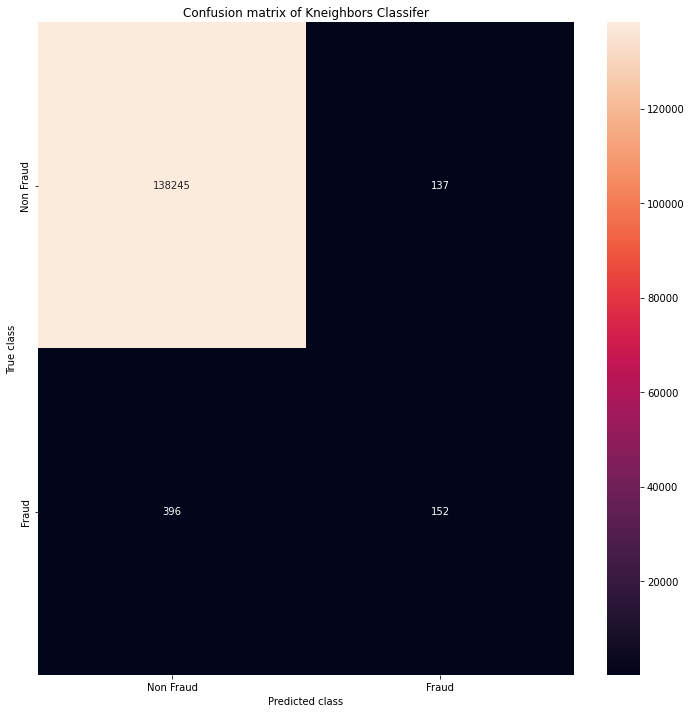

In [ ]:
LABELS = ['Non Fraud', 'Fraud']
conf_matrix = confusion_matrix(y_test, kn_yhat)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix of Kneighbors Classifer")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()